In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [3]:
df_orig = df.copy()


In [4]:
df.loc[0:5, 'bmi'] = np.nan
df.loc[10:12, 'bp'] = np.nan
print("🔹 Missing values before filling:\n", df.isnull().sum())

🔹 Missing values before filling:
 age       0
sex       0
bmi       6
bp        3
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [5]:
df.fillna(df.median(numeric_only=True), inplace=True)
print("🔹 After imputation:\n", df.isnull().sum())


🔹 After imputation:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [7]:
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

df_minmax = df.copy()
df_standard = df.copy()

df_minmax[diabetes.feature_names] = scaler_minmax.fit_transform(df[diabetes.feature_names])
df_standard[diabetes.feature_names] = scaler_standard.fit_transform(df[diabetes.feature_names])

In [8]:
df['bmi_bin'] = pd.cut(df['bmi'], bins=3, labels=["Low", "Medium", "High"])


In [9]:
df['age_bmi'] = df['age'] * df['bmi']
df['bp_hdl'] = df['bp'] * df['s5']

In [10]:
X = df[diabetes.feature_names]
y = df['target']
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("🔹 Top 5 features selected:", selected_features.tolist())

🔹 Top 5 features selected: ['bmi', 'bp', 's3', 's4', 's5']


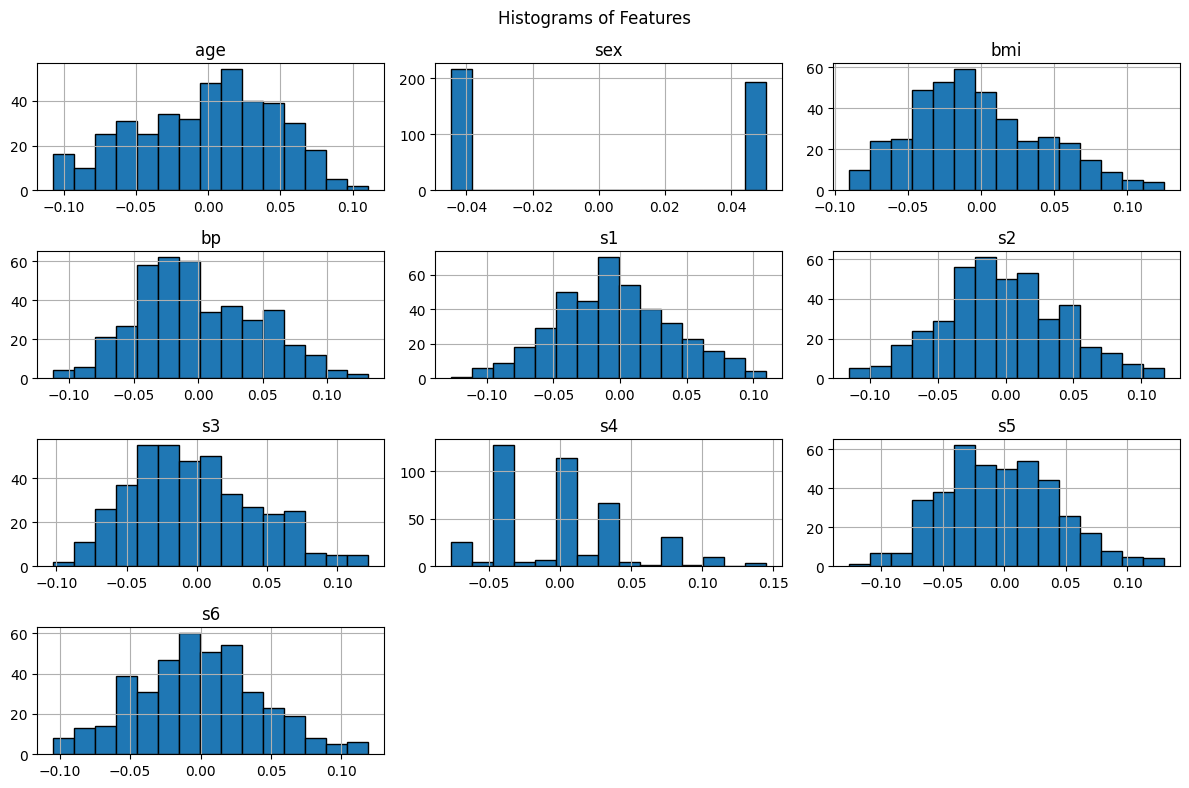

In [11]:
df[diabetes.feature_names].hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.suptitle("Histograms of Features")
plt.tight_layout()
plt.show()


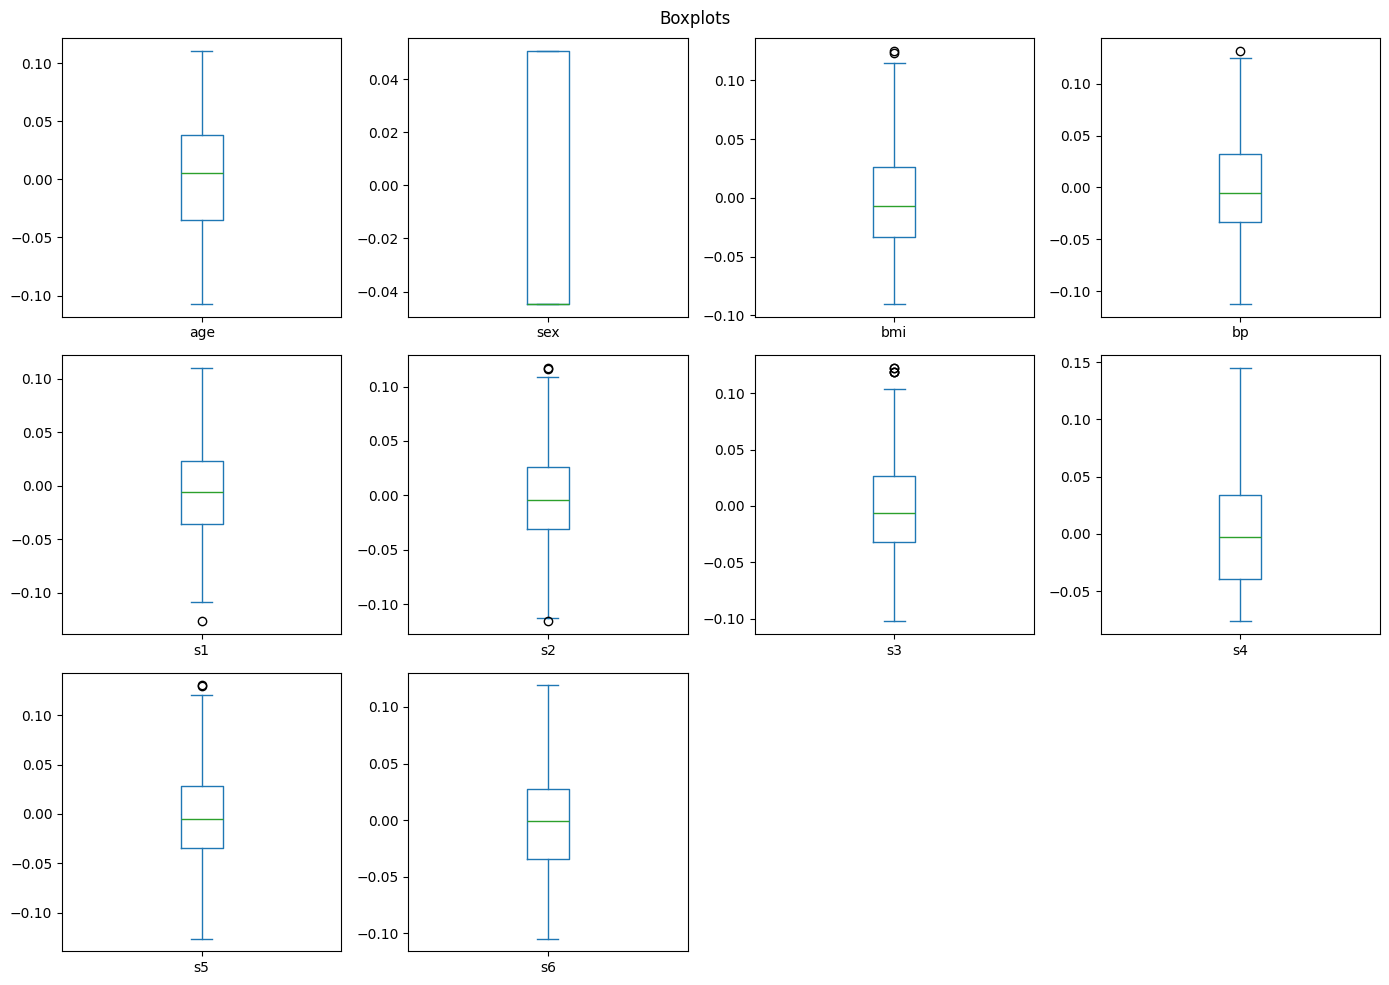

In [12]:
df[diabetes.feature_names].plot(kind='box', subplots=True, layout=(3, 4), figsize=(14, 10), title="Boxplots")
plt.tight_layout()
plt.show()

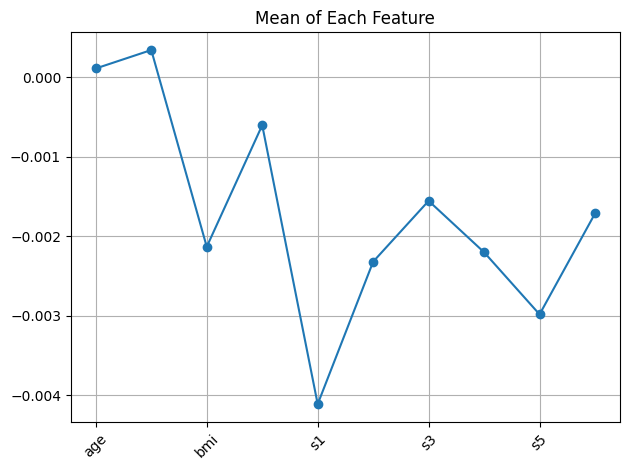

In [13]:
means = df[diabetes.feature_names].mean()
means.plot(kind='line', marker='o')
plt.title("Mean of Each Feature")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

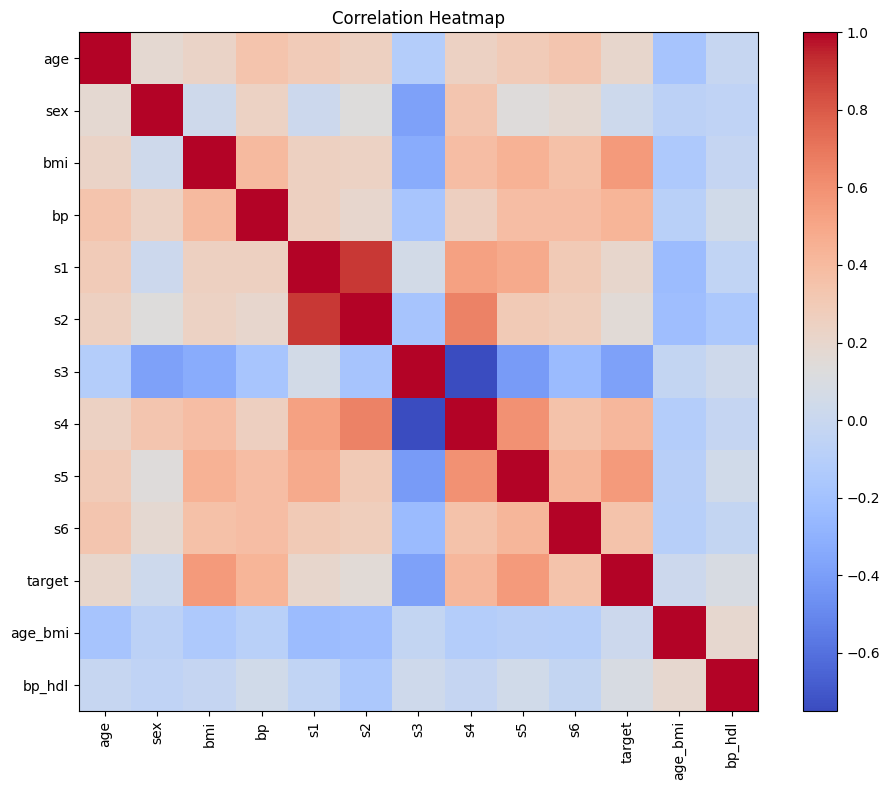

In [14]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

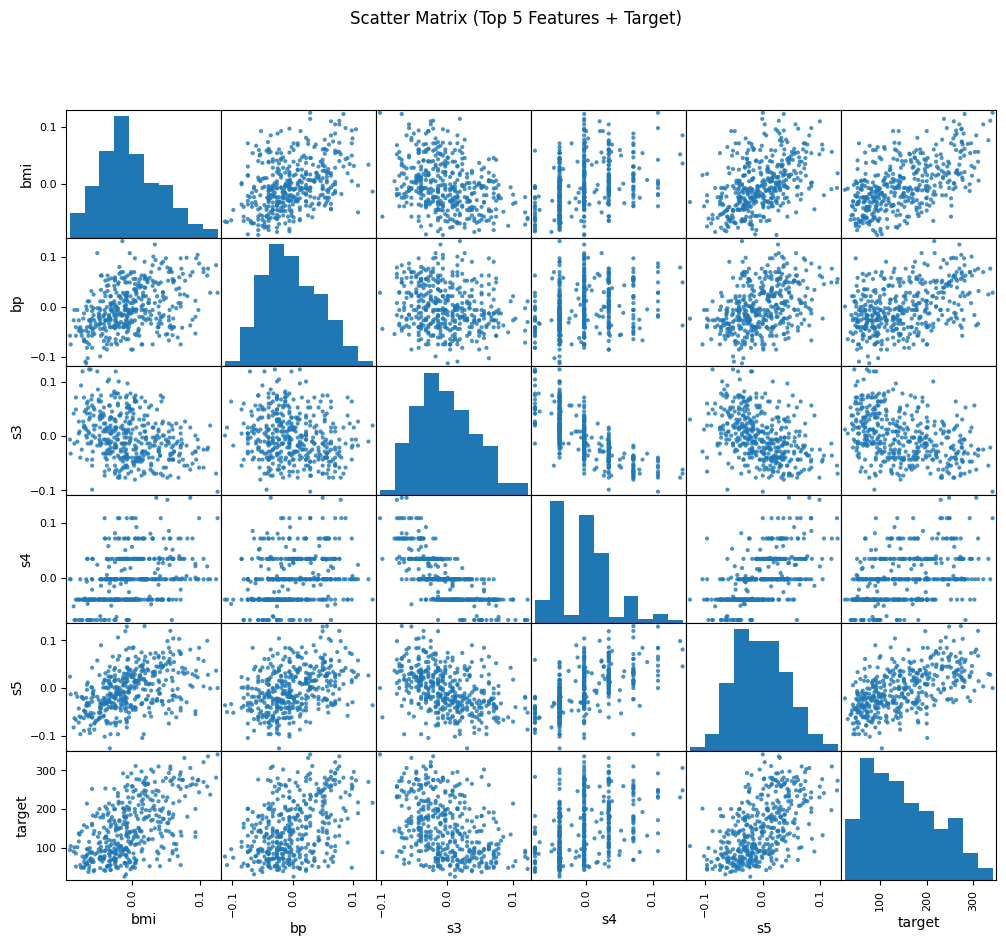

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[selected_features.tolist() + ['target']], figsize=(12, 10), alpha=0.8, diagonal='hist')
plt.suptitle("Scatter Matrix (Top 5 Features + Target)")
plt.show()

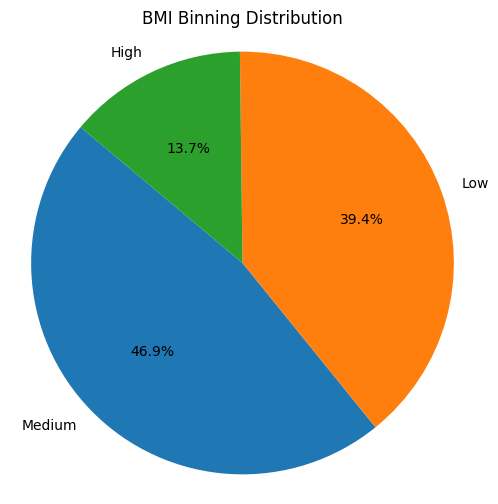

In [16]:
plt.figure(figsize=(6, 6))
df['bmi_bin'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("BMI Binning Distribution")
plt.ylabel("")
plt.axis('equal')
plt.show()

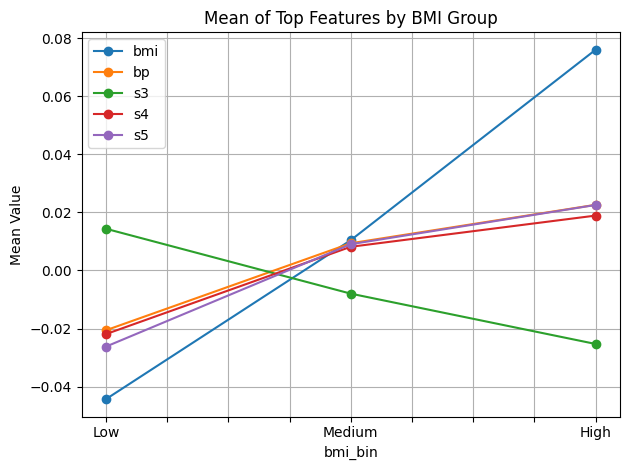

In [17]:
mean_grouped = df.groupby('bmi_bin', observed=True)[selected_features].mean()
mean_grouped.plot(kind='line', marker='o')
plt.title("Mean of Top Features by BMI Group")
plt.ylabel("Mean Value")
plt.grid(True)
plt.tight_layout()
plt.show()

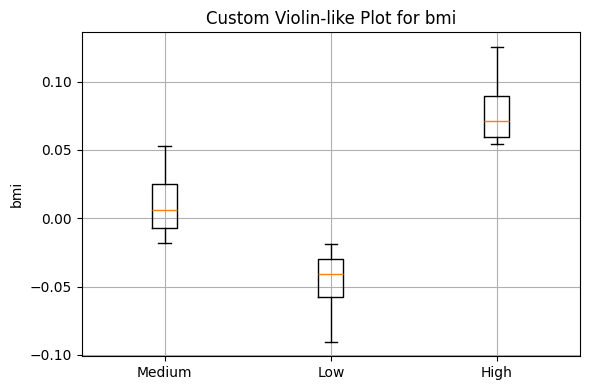

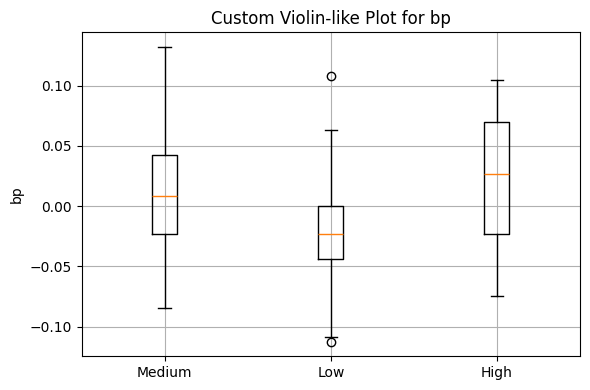

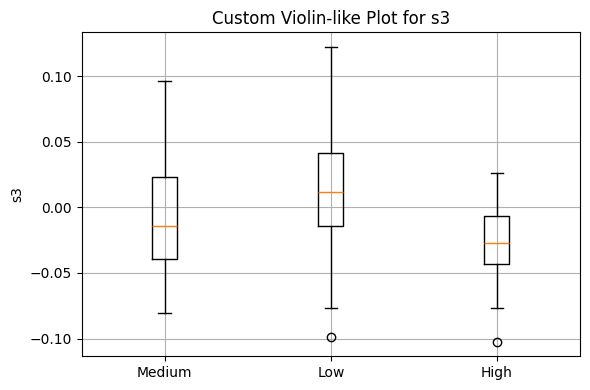

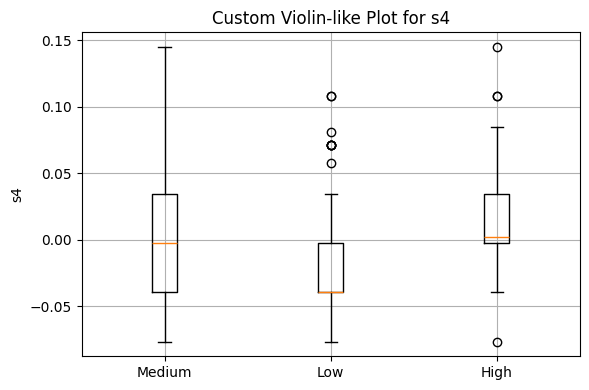

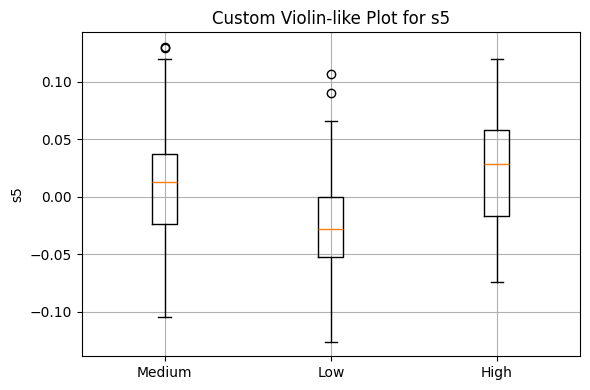

In [18]:
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    for i, group in enumerate(df['bmi_bin'].dropna().unique()):
        data = df[df['bmi_bin'] == group][feature]
        plt.boxplot(data, positions=[i])
    plt.xticks(range(len(df['bmi_bin'].dropna().unique())), df['bmi_bin'].dropna().unique())
    plt.title(f"Custom Violin-like Plot for {feature}")
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [19]:
# Skewness and Kurtosis
skewness = df[diabetes.feature_names].skew()
kurtosis = df[diabetes.feature_names].kurt()

print("🔹 Skewness:\n", skewness)
print("🔹 Kurtosis:\n", kurtosis)


🔹 Skewness:
 age   -0.255916
sex    0.113063
bmi    0.462780
bp     0.312219
s1     0.126606
s2     0.093401
s3     0.419665
s4     0.671554
s5     0.236942
s6     0.143236
dtype: float64
🔹 Kurtosis:
 age   -0.674778
sex   -1.997006
bmi   -0.262762
bp    -0.459589
s1    -0.232286
s2    -0.213673
s3    -0.254227
s4     0.249596
s5    -0.190126
s6    -0.228353
dtype: float64


In [20]:
df_log = df.copy()
for col in diabetes.feature_names:
    df_log[col] = np.log1p(df_log[col] - df_log[col].min() + 1)  # to handle negative values


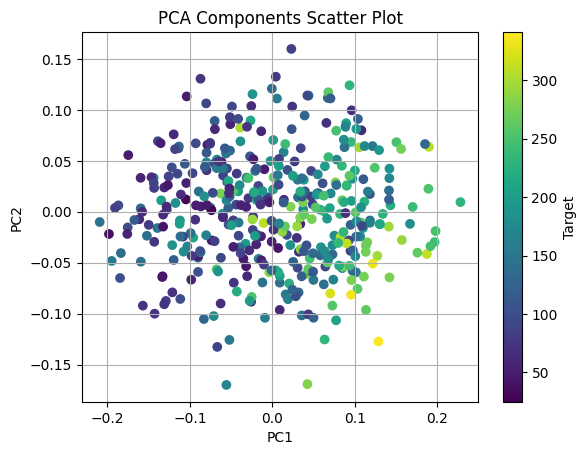

🔹 Polynomial Features Shape: (409, 65)


In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=y, cmap='viridis')
plt.title("PCA Components Scatter Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Target')
plt.grid(True)
plt.show()
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
print("🔹 Polynomial Features Shape:", X_poly.shape)


In [22]:
df['s1_s2_interaction'] = df['s1'] * df['s2']
df['log_age'] = np.log1p(df['age'] - df['age'].min() + 1)
le = LabelEncoder()
df['bmi_bin_encoded'] = le.fit_transform(df['bmi_bin'])
print("🔹 BMI bin encoding:\n", df[['bmi_bin', 'bmi_bin_encoded']].drop_duplicates())


🔹 BMI bin encoding:
   bmi_bin  bmi_bin_encoded
0  Medium                2
6     Low                1
8    High                0


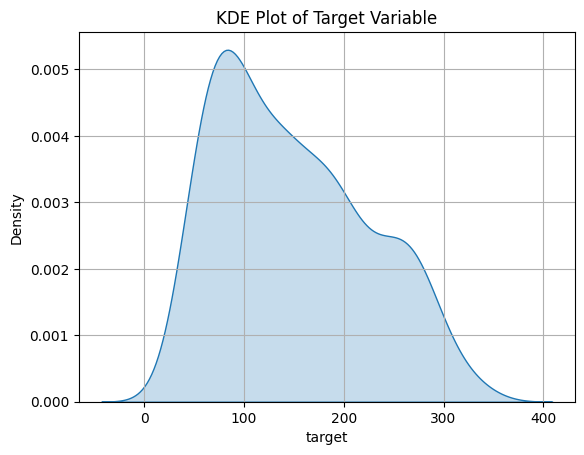

In [23]:
import seaborn as sns
sns.kdeplot(df['target'], fill=True)
plt.title("KDE Plot of Target Variable")
plt.grid(True)
plt.show()


In [24]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


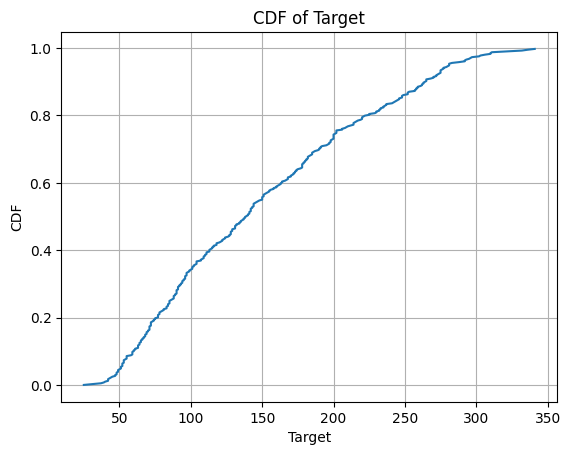

In [25]:
sorted_target = np.sort(df['target'])
cdf = np.arange(len(sorted_target)) / float(len(sorted_target))
plt.plot(sorted_target, cdf)
plt.title("CDF of Target")
plt.xlabel("Target")
plt.ylabel("CDF")
plt.grid(True)
plt.show()


In [26]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
df_robust = df.copy()
df_robust[diabetes.feature_names] = robust_scaler.fit_transform(df[diabetes.feature_names])


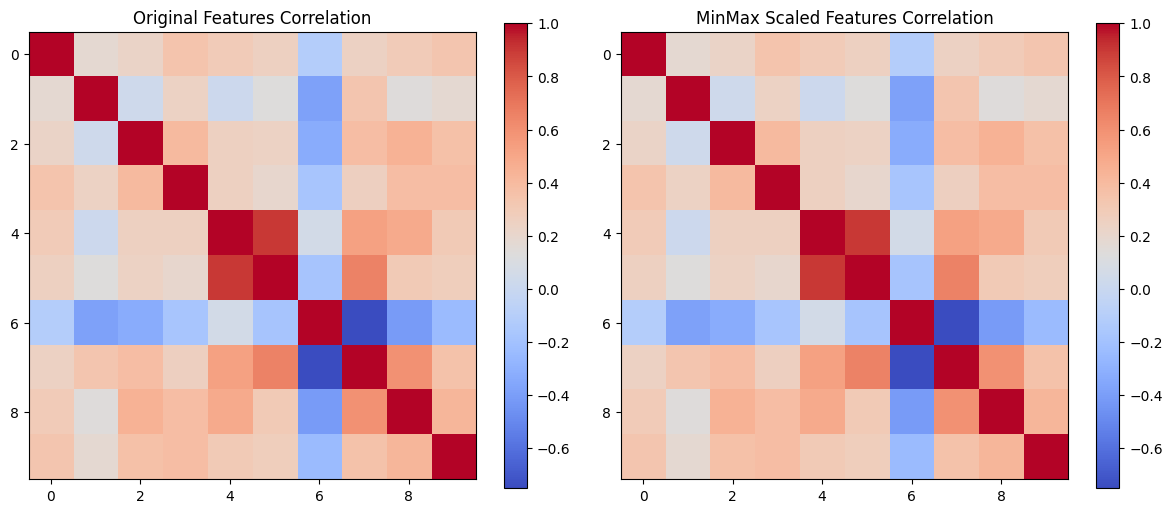

In [27]:
corr_original = df[diabetes.feature_names].corr()
corr_scaled = df_minmax[diabetes.feature_names].corr()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(corr_original, cmap='coolwarm')
plt.title("Original Features Correlation")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(corr_scaled, cmap='coolwarm')
plt.title("MinMax Scaled Features Correlation")
plt.colorbar()
plt.tight_layout()
plt.show()


In [28]:
df_missing = df.copy()
np.random.seed(42)
for col in ['s1', 's2', 's3']:
    df_missing.loc[df_missing.sample(frac=0.1).index, col] = np.nan

In [29]:
df_missing.fillna(df_missing.select_dtypes(include='number').median(), inplace=True)
df_missing['bmi_age'] = df_missing['bmi'] * df_missing['age']
df_missing['s1_log'] = np.log1p(df_missing['s1'] - df_missing['s1'].min() + 1)

In [30]:
for col in diabetes.feature_names:
    print(f"{col} - Skew: {df_missing[col].skew():.2f}, Kurtosis: {df_missing[col].kurtosis():.2f}")


age - Skew: -0.26, Kurtosis: -0.67
sex - Skew: 0.11, Kurtosis: -2.00
bmi - Skew: 0.46, Kurtosis: -0.26
bp - Skew: 0.31, Kurtosis: -0.46
s1 - Skew: 0.16, Kurtosis: 0.13
s2 - Skew: 0.07, Kurtosis: 0.09
s3 - Skew: 0.47, Kurtosis: 0.03
s4 - Skew: 0.67, Kurtosis: 0.25
s5 - Skew: 0.24, Kurtosis: -0.19
s6 - Skew: 0.14, Kurtosis: -0.23


In [31]:
df_missing['bmi_category'] = pd.cut(df_missing['bmi'], bins=3, labels=["Low", "Medium", "High"])
df_missing['bmi_encoded'] = LabelEncoder().fit_transform(df_missing['bmi_category'])

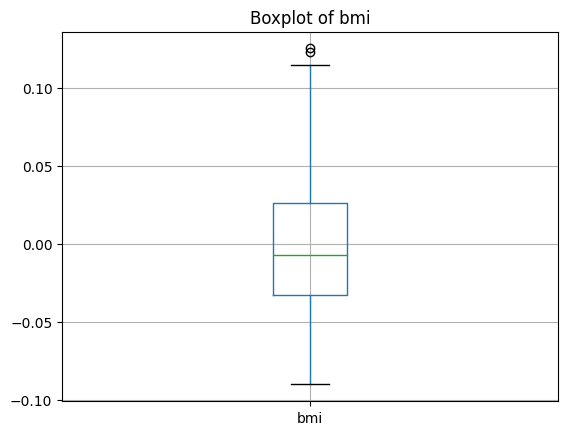

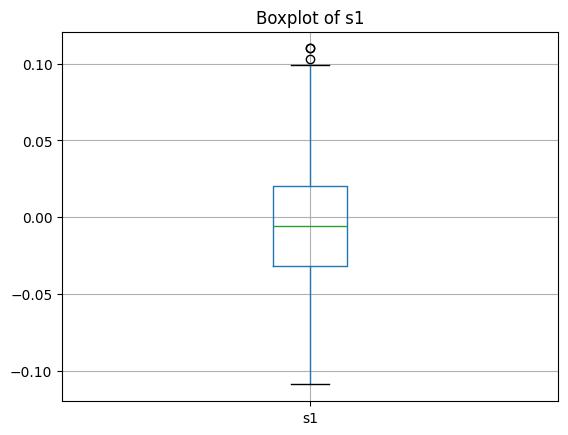

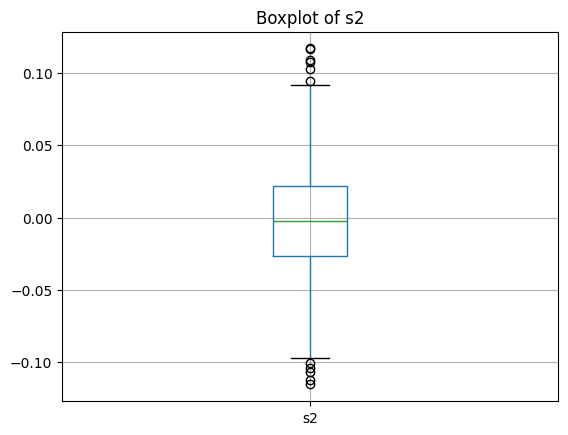

In [32]:
for col in ['bmi', 's1', 's2']:
    plt.figure()
    df_missing.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()


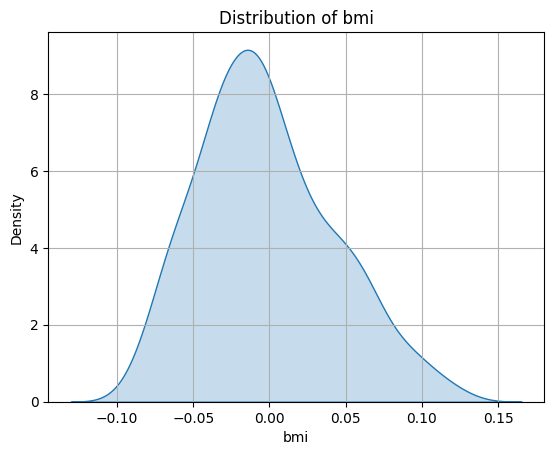

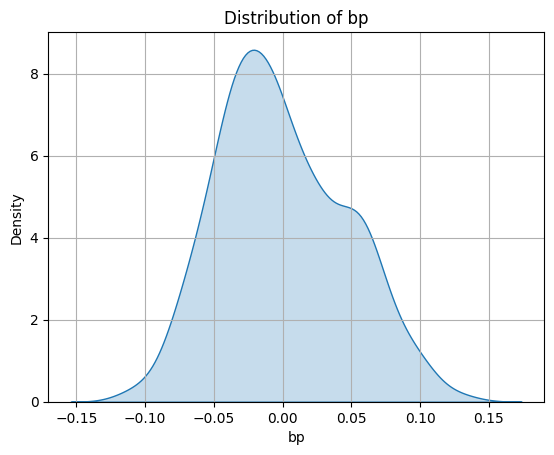

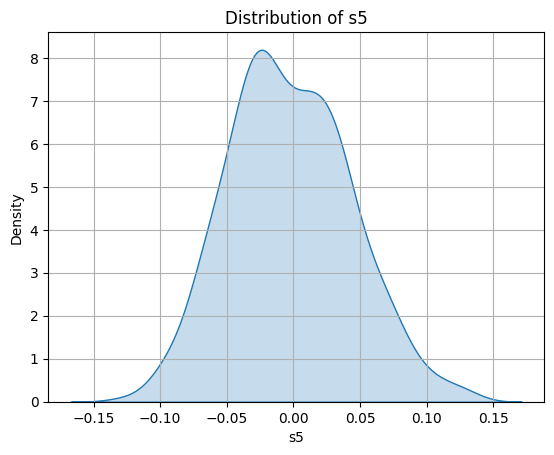

In [33]:
for col in ['bmi', 'bp', 's5']:
    plt.figure()
    sns.kdeplot(df_missing[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.grid(True)
    plt.show()


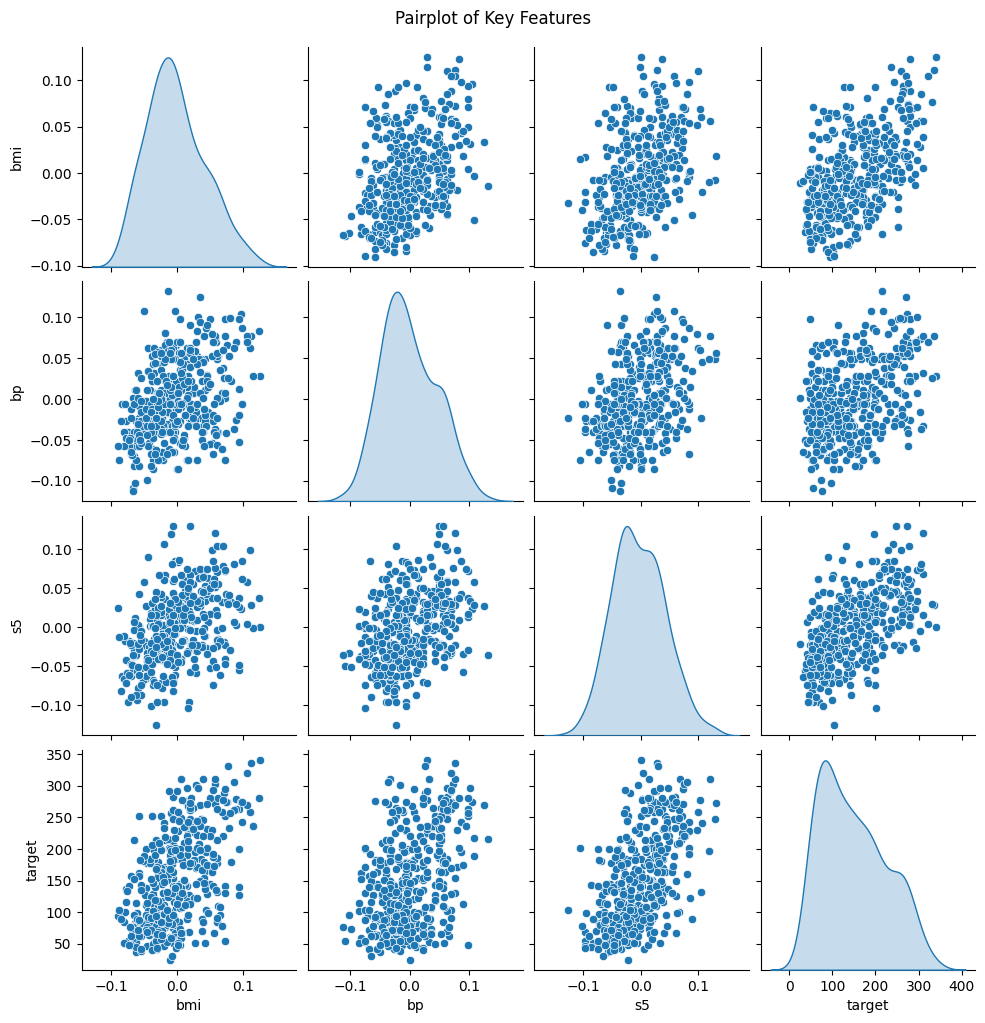

In [34]:
import seaborn as sns
sns.pairplot(df_missing[['bmi', 'bp', 's5', 'target']], diag_kind='kde')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


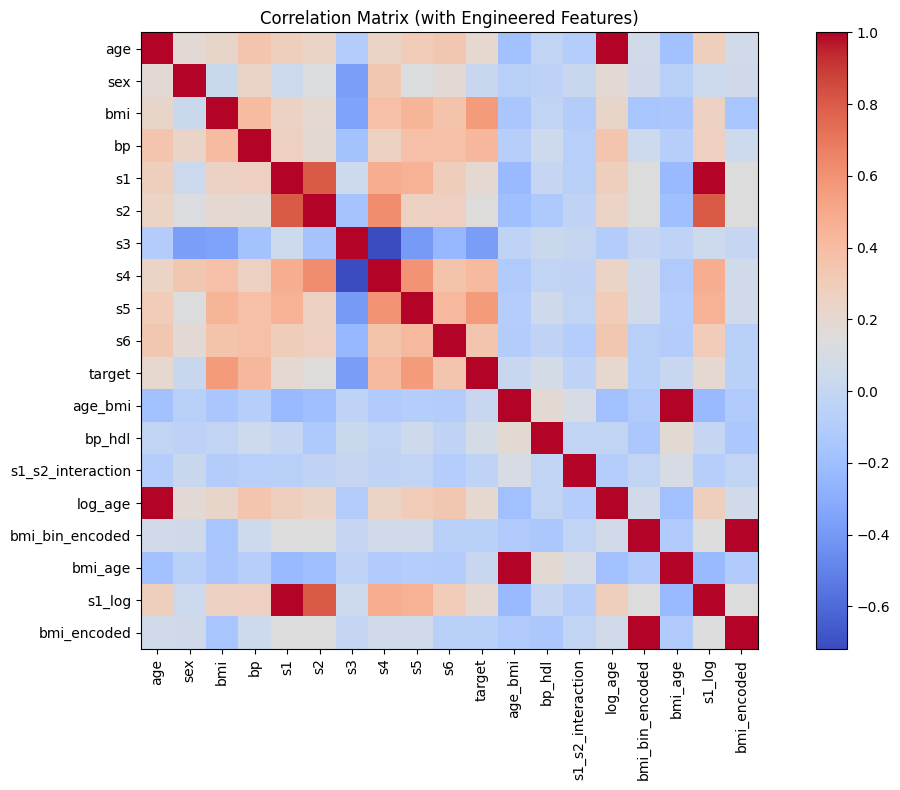

In [36]:
plt.figure(figsize=(12, 8))
cor = df_missing.select_dtypes(include='number').corr()
plt.imshow(cor, cmap='coolwarm')
plt.title("Correlation Matrix (with Engineered Features)")
plt.colorbar()
plt.xticks(ticks=np.arange(len(cor.columns)), labels=cor.columns, rotation=90)
plt.yticks(ticks=np.arange(len(cor.columns)), labels=cor.columns)
plt.tight_layout()
plt.show()


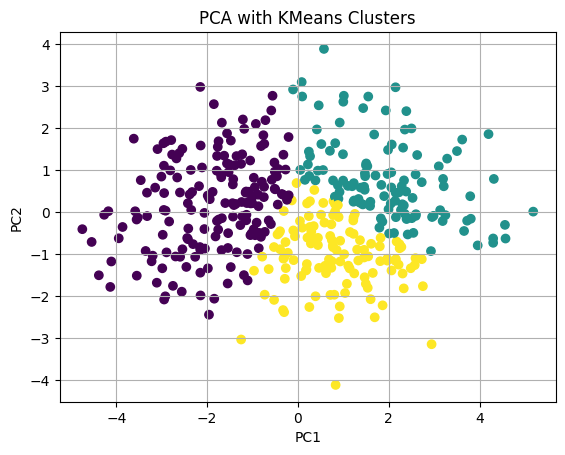

In [37]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X_scaled = StandardScaler().fit_transform(df_missing[diabetes.feature_names])
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(pca_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.title("PCA with KMeans Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


linear regression


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [41]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [42]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [43]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [44]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [45]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

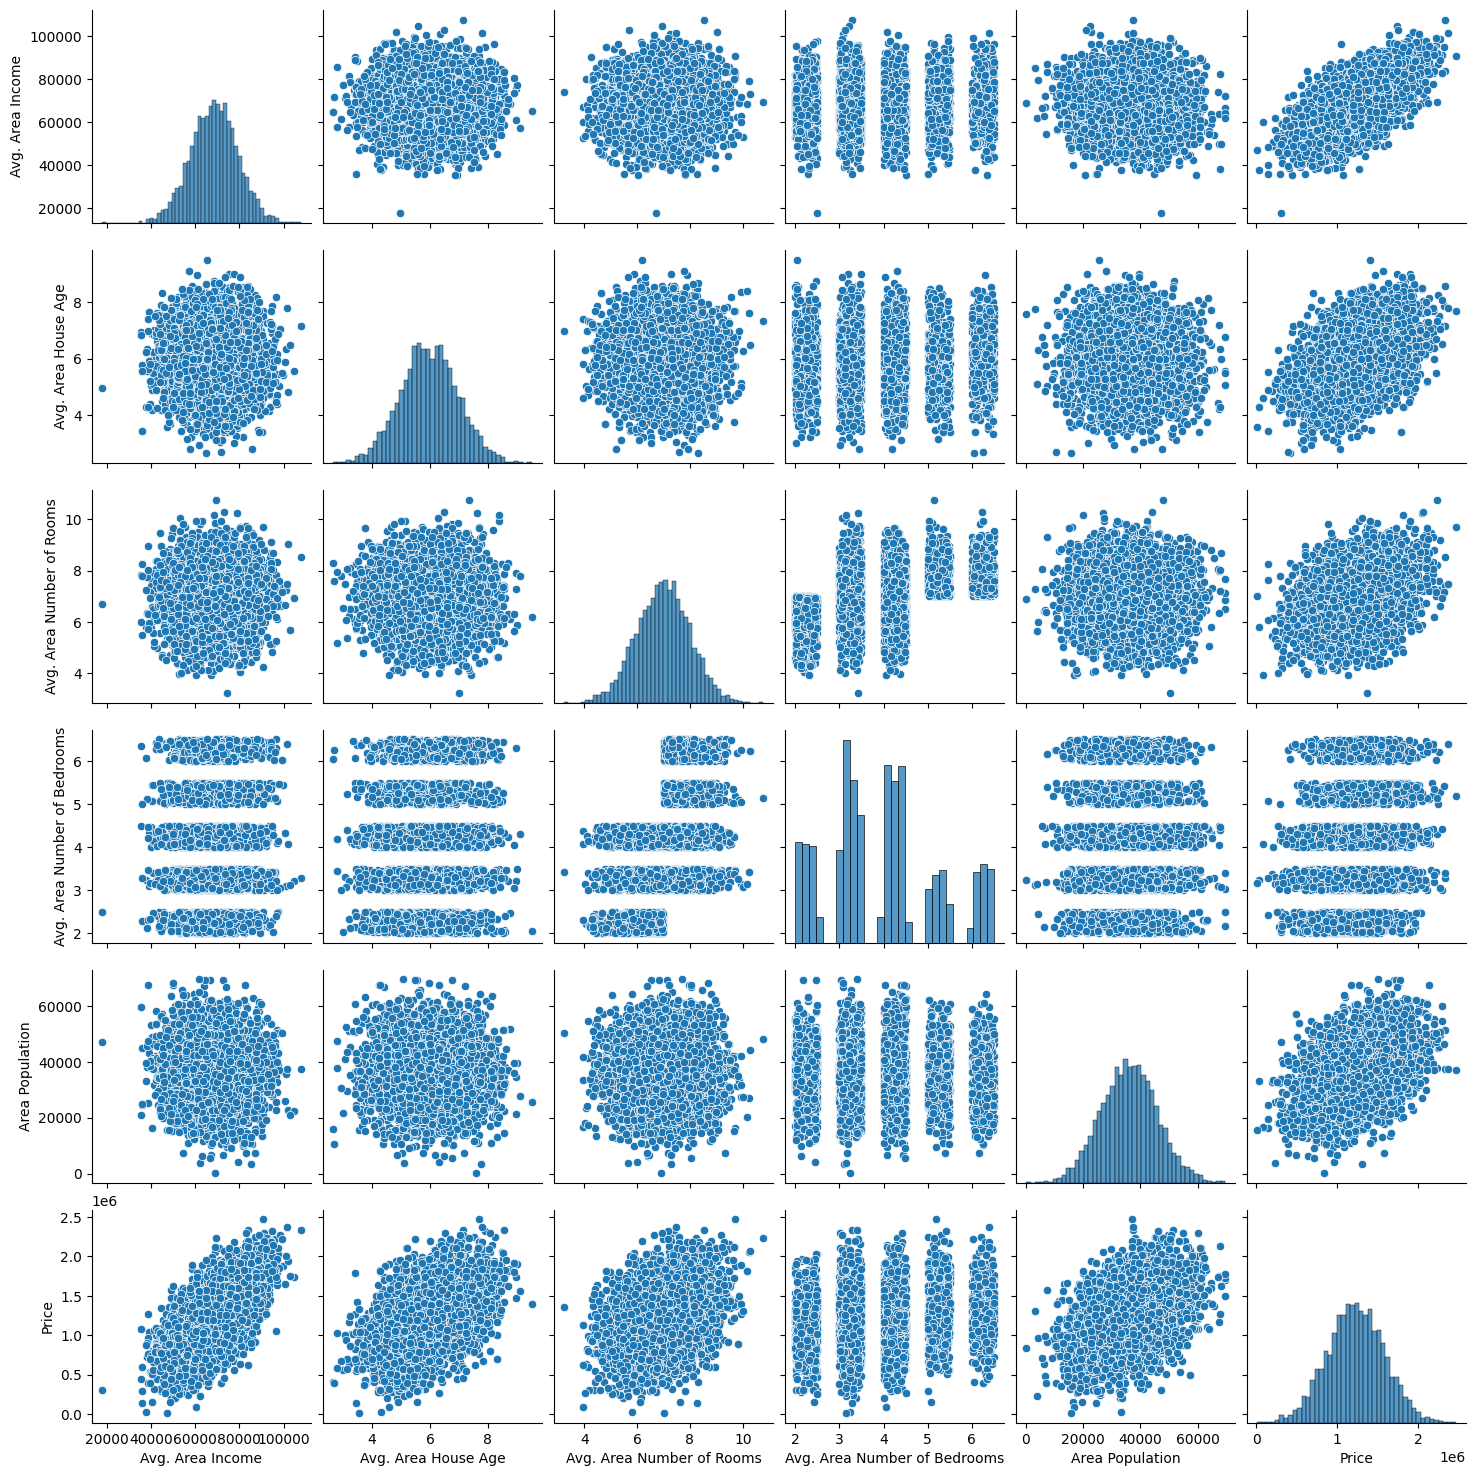

In [46]:
sns.pairplot(USAhousing)

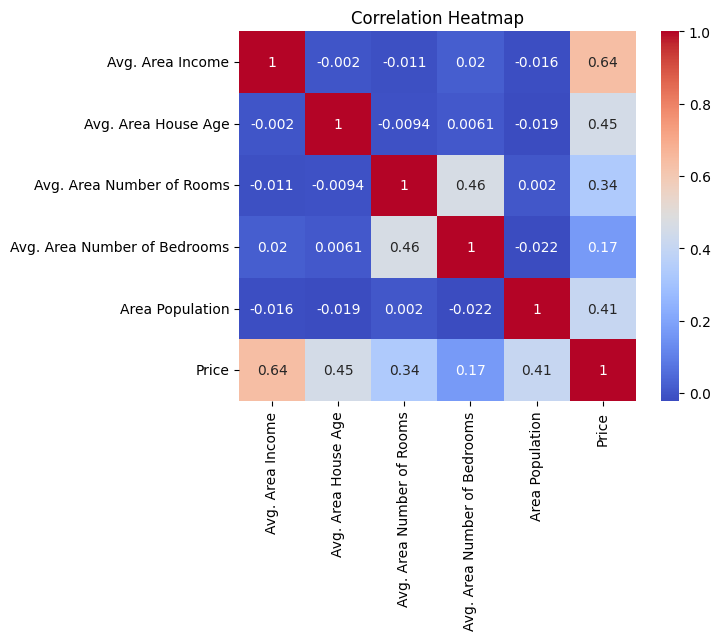

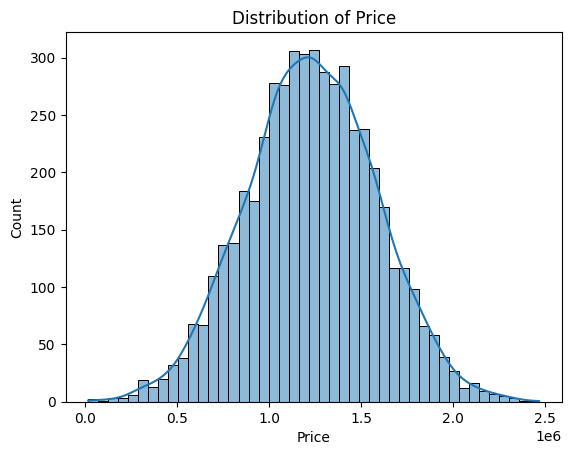

In [47]:
numeric_df = USAhousing.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
if 'Price' in numeric_df.columns:
    sns.histplot(numeric_df['Price'], kde=True)
    plt.title("Distribution of Price")
    plt.show()

In [48]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [50]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error (MAE): 80879.09723488029
Mean Squared Error (MSE): 10089009300.892078
Root Mean Squared Error (RMSE): 100444.0605555753


cars

In [52]:
def avg(l):
  sum=0
  count=0
  for e in l:
    sum=sum+e
    count=count+1
  avg=sum/count
  print(avg)

In [53]:
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
avg(speed)

89.76923076923077


In [54]:
import numpy
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
x = numpy.mean(speed)
print(x)

89.76923076923077


In [55]:
import numpy
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
x = numpy.median(speed)
print(x)


87.0


In [56]:
from scipy import stats
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
x = stats.mode(speed)
print(x)

ModeResult(mode=np.int64(86), count=np.int64(3))


In [57]:
import numpy
speed = [86,87,88,86,87,85,86]
x = numpy.std(speed)
print(x)

0.9035079029052513


In [58]:
import numpy
speed = [32,111,138,28,59,77,97]
x = numpy.std(speed)
m = numpy.mean(speed)
print(x)
print(m)

37.84501153334721
77.42857142857143


In [59]:
import numpy
speed = [32,111,138,28,59,77,97]
x = numpy.var(speed)
print(x)

1432.2448979591834


In [60]:
import numpy
speed = [32,111,138,28,59,77,97]
x = numpy.std(speed)
print(x)

37.84501153334721


In [61]:
import numpy
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]
x = numpy.percentile(ages, 80)
print(x)


48.0


In [62]:
import numpy
x = numpy.random.uniform(0.0, 5.0, 250)
print(x)

[2.63289233e+00 4.00374886e+00 4.89465718e+00 4.19894430e+00
 4.33496880e+00 2.03992248e+00 2.75861298e+00 1.26944282e+00
 9.80565498e-01 2.52753940e+00 2.97524490e+00 1.69635623e+00
 2.84721759e+00 4.43730241e+00 2.78360792e+00 3.60406548e+00
 4.02657484e+00 4.94364391e+00 3.01598701e+00 4.03425074e+00
 4.81324659e+00 4.72204863e+00 7.05409244e-01 2.03196154e+00
 1.61995031e+00 4.34625075e-01 3.16620387e+00 3.67952307e+00
 4.24064048e+00 6.13884448e-01 4.38222038e+00 3.21462782e+00
 3.51973068e+00 4.55312002e+00 3.12380636e+00 1.67932929e+00
 4.12553666e+00 1.81529606e+00 1.71140554e-01 4.15327253e+00
 1.72596072e+00 3.86917262e+00 1.81378947e+00 4.30534010e+00
 1.09755263e+00 4.87273633e+00 3.89879387e+00 5.71189630e-01
 2.82888310e+00 4.92683656e+00 2.35532726e+00 9.10535694e-01
 2.42389184e+00 2.56228828e+00 3.70843472e+00 3.49422927e+00
 2.01275022e+00 1.09011554e+00 3.22527084e+00 2.10851967e+00
 6.61381056e-01 4.50286151e+00 3.45610929e+00 3.41591928e+00
 4.11291938e+00 2.648308

[0.17711184 1.64525683 4.65794744 3.67606327 1.4069548  1.26324547
 0.0254107  3.47857146 0.24391791 2.6630126  4.81060986 0.5473443
 4.47239965 4.95737668 0.30758513 4.41453135 2.5803951  4.5325686
 2.85659471 3.31056005 2.71889454 4.3224644  3.66954959 2.60630156
 4.34080402 1.22642766 0.7867033  0.80200053 1.67004439 1.19345016
 4.65045175 0.52917047 3.49495369 0.9461077  4.40818566 4.80657644
 2.32735004 4.3953574  0.02572585 4.09973459 1.14312581 4.54350655
 0.00560056 2.78090868 3.78317902 1.29344165 0.96566432 0.42049112
 1.63216788 2.79922156 0.57921928 1.88347681 0.04536202 4.0933971
 0.64224359 1.41671474 0.09213859 2.16120392 4.20060751 1.96075606
 0.89748662 3.76849417 3.94403491 0.86876738 3.85427054 4.73648944
 0.83188793 3.85492146 3.54286002 2.36786944 0.2896023  0.37347209
 4.2620733  4.95074186 3.38026129 2.22979154 3.23786822 2.9719793
 1.9180613  0.32813072 4.10756474 1.85916765 4.09392822 1.26254375
 0.0051474  0.79469142 2.34269708 4.72151817 0.5109681  4.27104887

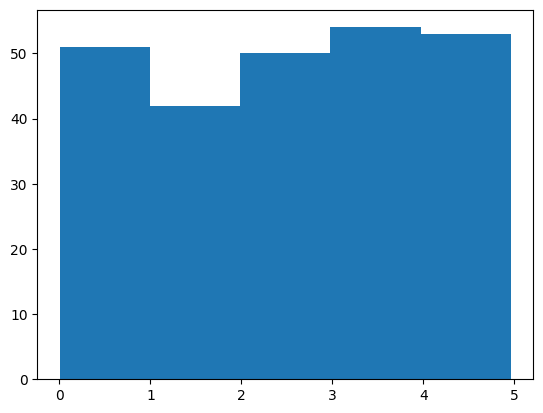

In [63]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.uniform(0.0, 5.0, 250)
print(x)
plt.hist(x, 5)
plt.show()

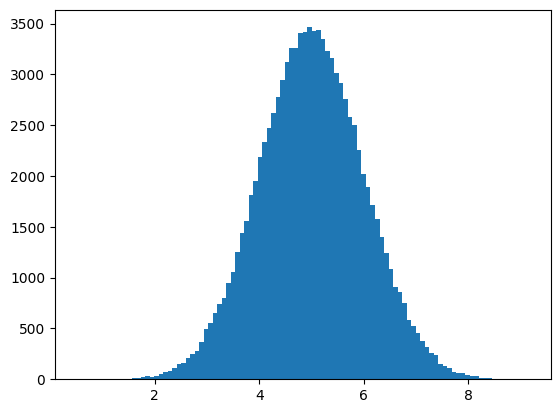

In [64]:

import numpy
import matplotlib.pyplot as plt
#mean and std
x = numpy.random.normal(5.0, 1.0, 100000)

plt.hist(x, 100)
plt.show()

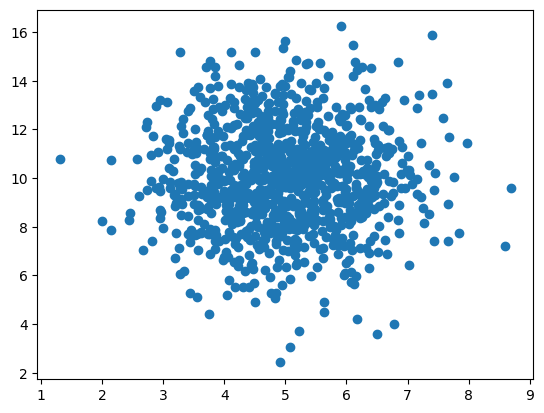

In [65]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.normal(5.0, 1.0, 1000)
y = numpy.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

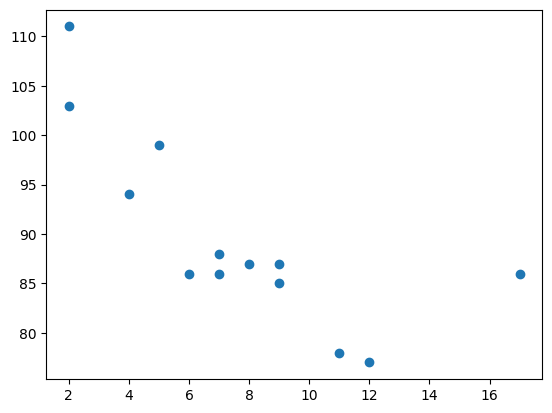

In [75]:
import matplotlib.pyplot as plt
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

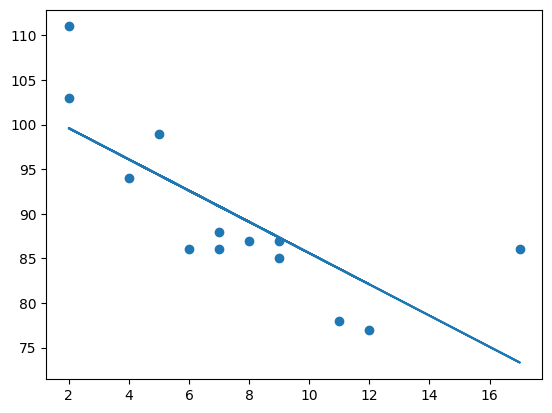

In [76]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept 

mymodel = list(map(myfunc, x))
plt.scatter(x, y) 

plt.plot(x, mymodel) 
plt.show() 

In [77]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

speed = myfunc(10)

print(speed)
print(r)


85.59308314937454
-0.758591524376155


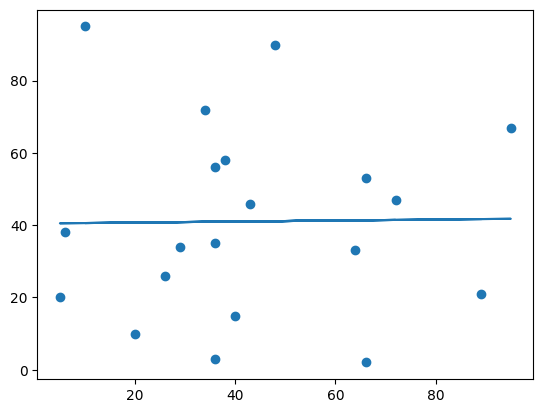

In [78]:
import matplotlib.pyplot as plt
from scipy import stats

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [79]:
import numpy
from scipy import stats

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)
#Excercise
print(p)
print(std_err)

0.01331814154297491
0.955558800440106
0.24627150586388075


wine

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [67]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df_cleaned = df.dropna(axis=1, how='all').copy()


In [68]:
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Summary Stats ---")
print(df.describe())
print("\n--- Class Distribution ---")
print(df['target'].value_counts())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null

In [69]:
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Summary Stats ---")
print(df.describe())
print("\n--- Class Distribution ---")
print(df['target'].value_counts())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null

In [70]:
np.random.seed(0)
for col in df.columns[:-1]:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

print("\n--- Missing After Injection ---")
print(df.isnull().sum())


--- Missing After Injection ---
alcohol                         9
malic_acid                      9
ash                             9
alcalinity_of_ash               9
magnesium                       9
total_phenols                   9
flavanoids                      9
nonflavanoid_phenols            9
proanthocyanins                 9
color_intensity                 9
hue                             9
od280/od315_of_diluted_wines    9
proline                         9
target                          0
dtype: int64


In [71]:
np.random.seed(0)
for col in df.columns[:-1]:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

print("\n--- Missing After Injection ---")
print(df.isnull().sum())


--- Missing After Injection ---
alcohol                         9
malic_acid                      9
ash                             9
alcalinity_of_ash               9
magnesium                       9
total_phenols                   9
flavanoids                      9
nonflavanoid_phenols            9
proanthocyanins                 9
color_intensity                 9
hue                             9
od280/od315_of_diluted_wines    9
proline                         9
target                          0
dtype: int64


In [90]:
df.loc[0:5, 'bmi'] = np.nan
df.loc[10:12, 'bp'] = np.nan
print("🔹 Missing values before filling:\n", df.isnull().sum())

🔹 Missing values before filling:
 Kyphosis     4
Age          4
Number       4
Start        4
bmi         81
bp          81
dtype: int64


In [72]:

df_cleaned = df.dropna(axis=1, how='all').copy()
features = df_cleaned.columns[:-1]  
imputer = SimpleImputer(strategy='mean')
df_cleaned.loc[:, features] = imputer.fit_transform(df_cleaned[features])
scaler = StandardScaler()
df_cleaned.loc[:, features] = scaler.fit_transform(df_cleaned[features])


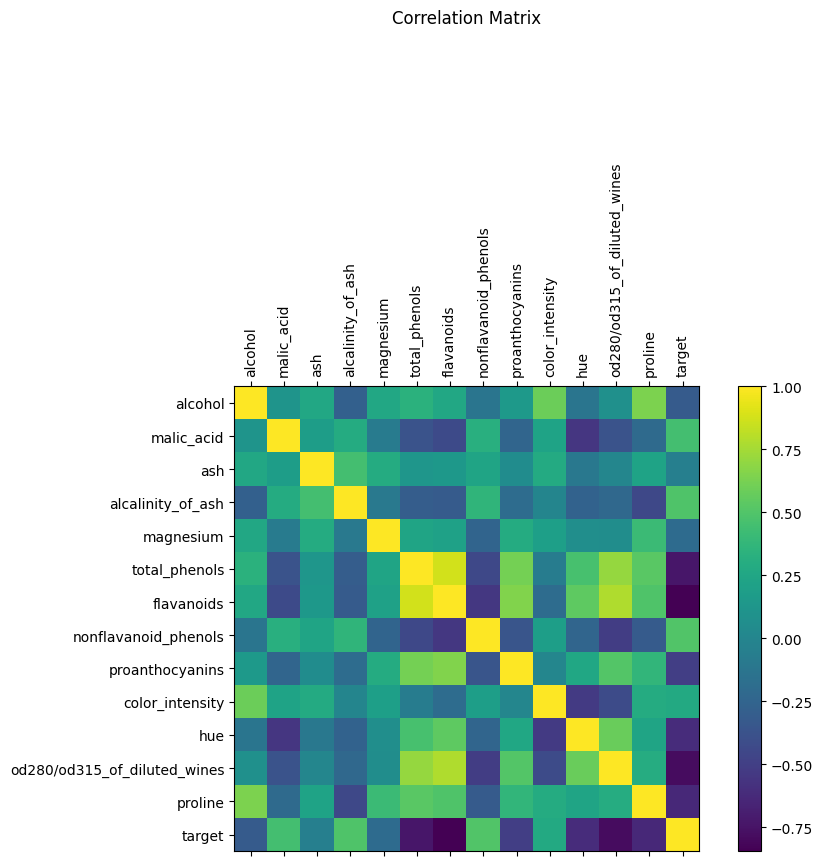

In [73]:
plt.figure(figsize=(10, 6))
plt.matshow(df.corr(), fignum=1)
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.title("Correlation Matrix", pad=100)
plt.show()

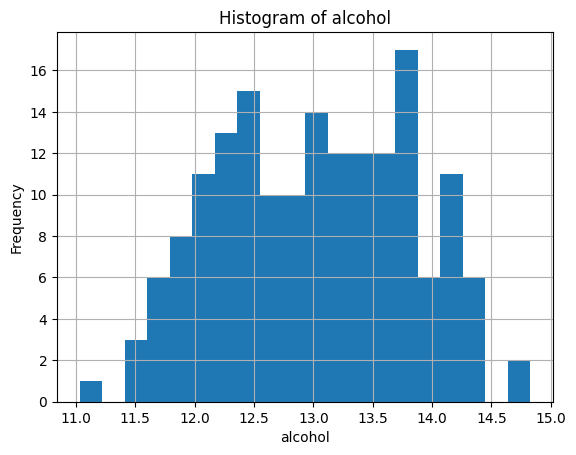

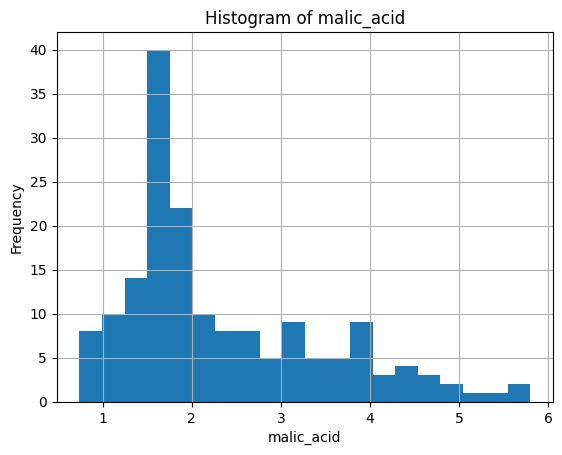

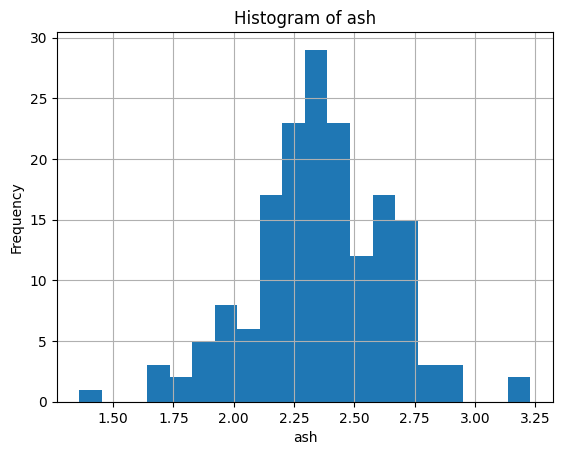

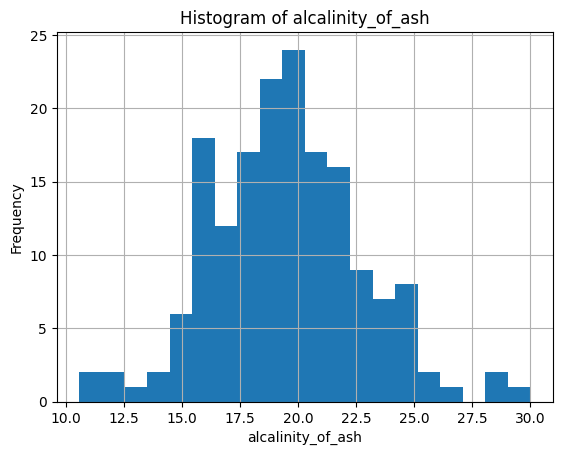

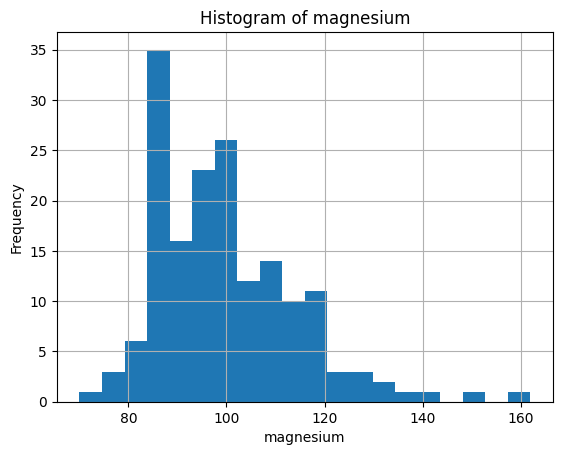

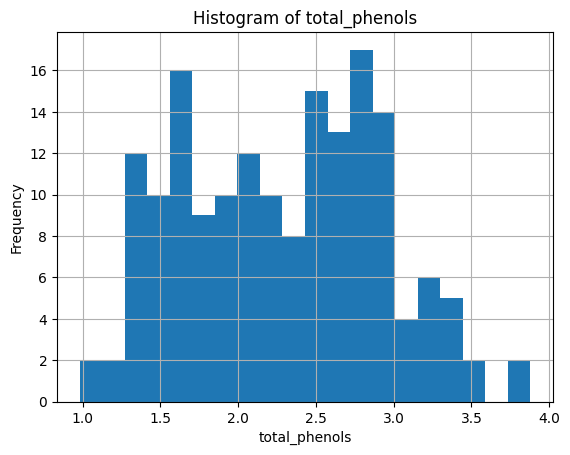

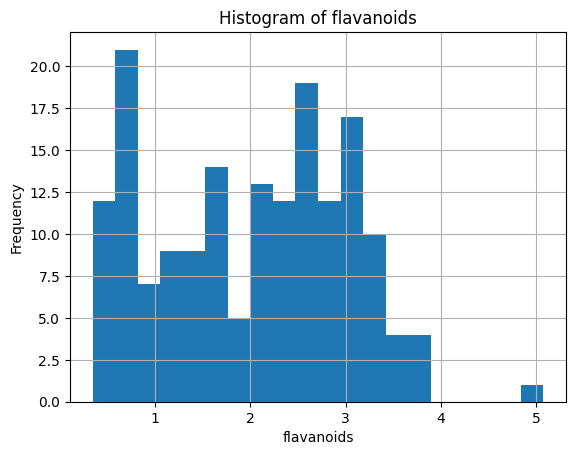

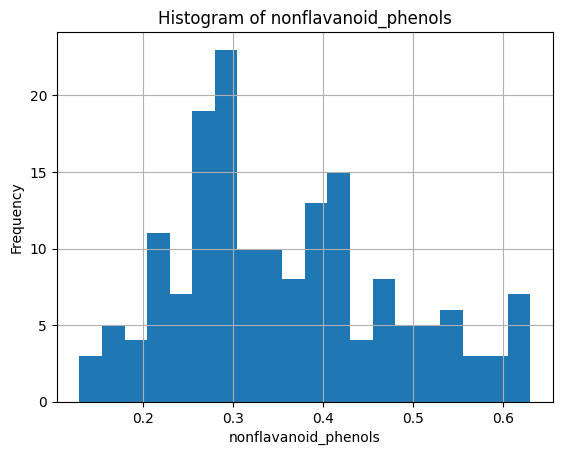

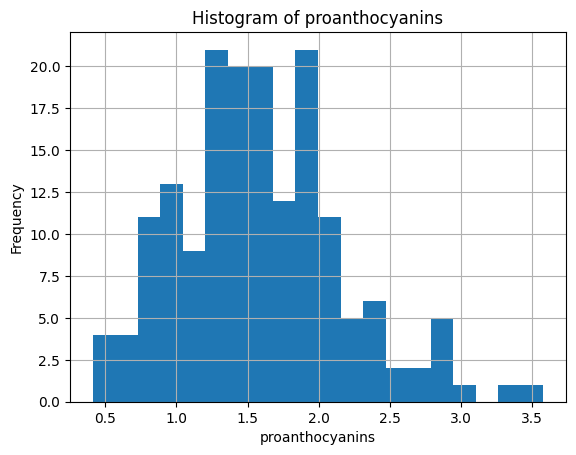

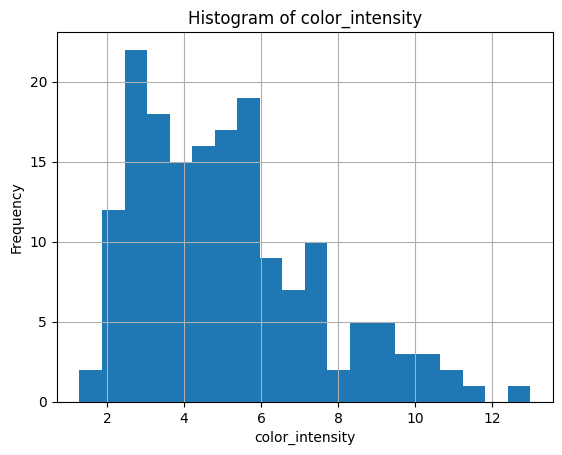

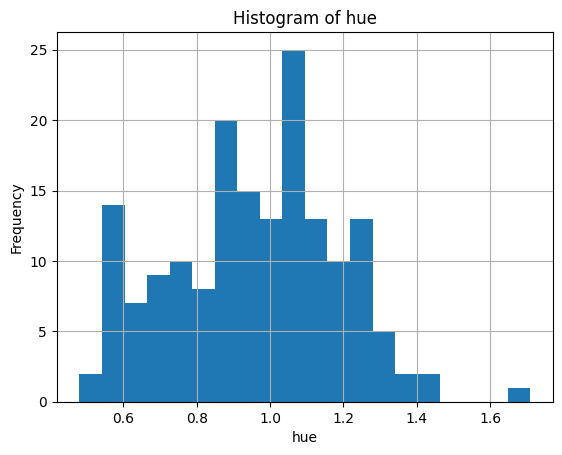

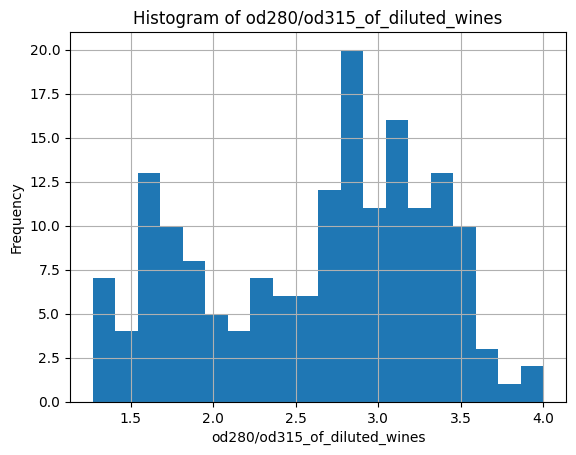

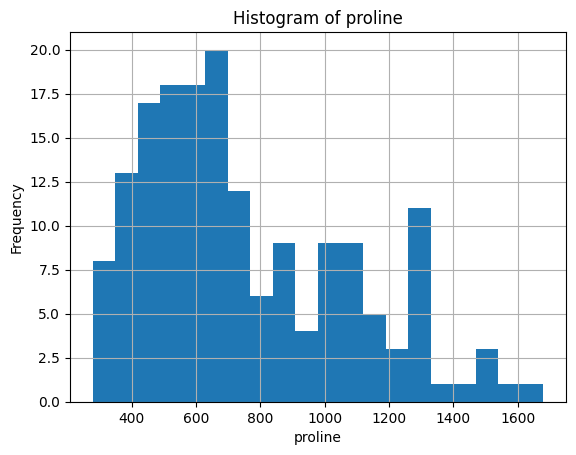

In [74]:

for col in df.columns[:-1]:
    if pd.api.types.is_numeric_dtype(df[col]) and df[col].notna().any():
        plt.figure()
        plt.hist(df[col].dropna(), bins=20)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
    else:
        print(f"Skipping column: {col} (non-numeric or all NaN)")



kyphosys

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


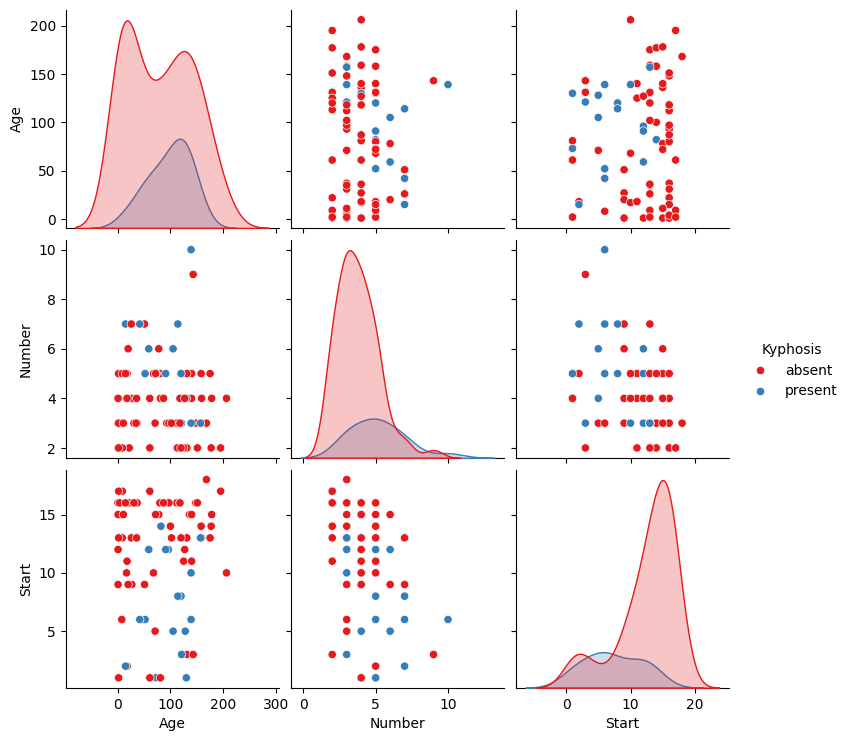

In [82]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [83]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [85]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.82      0.90      0.86        20
     present       0.33      0.20      0.25         5

    accuracy                           0.76        25
   macro avg       0.58      0.55      0.55        25
weighted avg       0.72      0.76      0.74        25



In [86]:
print(confusion_matrix(y_test,predictions))

[[18  2]
 [ 4  1]]


In [87]:
from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [88]:
df.loc[0:5, 'bmi'] = np.nan
df.loc[10:12, 'bp'] = np.nan
print("🔹 Missing values before filling:\n", df.isnull().sum())

🔹 Missing values before filling:
 Kyphosis     0
Age          0
Number       0
Start        0
bmi         81
bp          81
dtype: int64


In [89]:
np.random.seed(0)
for col in df.columns[:-1]:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

print("\n--- Missing After Injection ---")
print(df.isnull().sum())


--- Missing After Injection ---
Kyphosis     4
Age          4
Number       4
Start        4
bmi         81
bp          81
dtype: int64
